In [ ]:
##using face recognition

In [ ]:
!pip install face_recognition


     |████████████████████████████████| 100.2MB 45kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=55c6945c9ee70414550ca9967ab07ecfbf3cc275447481606bfe31935988a3e8
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


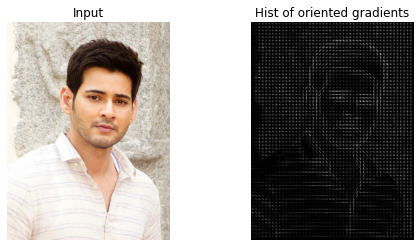

In [ ]:
import matplotlib.pyplot as plt
from skimage import data, exposure
from skimage.feature import hog
#!pip install opencv-python
import cv2
#!pip install urllib3
import urllib
from google.colab.patches import cv2_imshow
#!wget "https://drive.google.com/file/d/1od6Z2OUsgzB3Pk72BB_FDV9sjGIs1UJY/view?usp=sharing"
#image = io.imread("https://drive.google.com/file/d/1od6Z2OUsgzB3Pk72BB_FDV9sjGIs1UJY/view?usp=sharing")
img1 = cv2.imread("maheshbabu.jpg")
image=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
fd,hog_image = hog(image,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize = True,multichannel=True)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True ,sharey= True)
ax1.axis("off")
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title("Input")
hog_res=exposure.rescale_intensity(hog_image,in_range=(0,10))
ax2.axis("off")
ax2.imshow(hog_res,cmap=plt.cm.gray)
ax2.set_title("Hist of oriented gradients")
plt.show()


In [ ]:
image.shape

(1034, 775, 3)

In [ ]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
%matplotlib inline

In [ ]:
face_locations=face_recognition.face_locations(image)
number_of_faces = len(face_locations)
print("found {} faces".format(number_of_faces))

found 1 faces


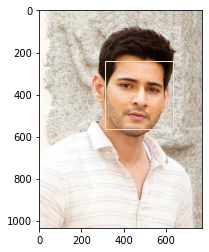

In [ ]:
plt.imshow(image)
ax=plt.gca()
for face_location in face_locations:
  top,right,bottom,left=face_location
  x,y,w,h = left,top,right,bottom
  rect=Rectangle((x,y),w-x,h-y,fill=False,color = "yellow")
  ax.add_patch(rect)
plt.show()

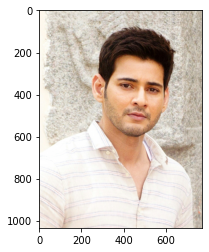

In [ ]:
img1 = cv2.imread("maheshbabu.jpg")
mb=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(mb)

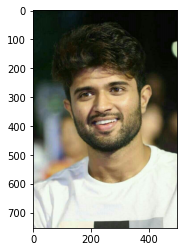

In [ ]:
img2 = cv2.imread("vd.jpg")
vd=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(vd)

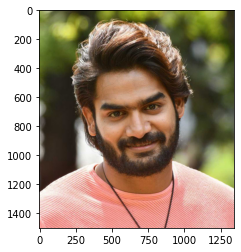

In [ ]:
img3 = cv2.imread("karthik.jpg")
k=cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(k)

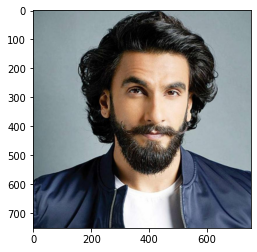

In [ ]:
img4 = cv2.imread("ran.jpg")
r=cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
plt.imshow(r)

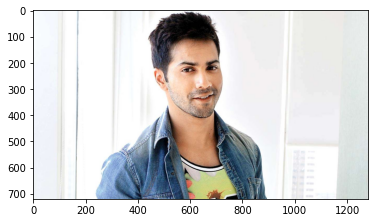

In [ ]:
img5 = cv2.imread("varun3.jpg")
v=cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
plt.imshow(v)

In [ ]:
mb_encoding = face_recognition.face_encodings(mb)[0]
vd_encoding = face_recognition.face_encodings(vd)[0]
k_encoding = face_recognition.face_encodings(k)[0]
r_encoding = face_recognition.face_encodings(r)
v_encoding = face_recognition.face_encodings(v)[0]
known_face_encodings = [
  mb_encoding,
  vd_encoding,
  k_encoding,
  r_encoding,
  v_encoding

]

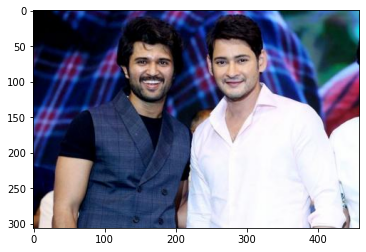

In [ ]:
image = cv2.imread("vdmb.jpg")
unknown_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)
unknown_face_encodings=face_recognition.face_encodings(unknown_image)

In [ ]:
from scipy.spatial import distance
for unknown_face_encoding in unknown_face_encodings:
  results=[]
  for known_face_encoding in known_face_encodings:
    d = distance.euclidean(known_face_encoding,unknown_face_encoding)
    results.append(d)
  threshold = 0.6
  results = np.array(results) <= threshold
  name = "unknown"
  if results[0]:
    name = "mahesh babu"
  elif results[1]:
    name = "vijay"
  elif results[2]:
    name = "karthikeya"
  elif results[3]:
    name = "ranveer"
  elif results[4]:
    name = "varun"
  print(f"{name} is in the pic")

vijay is in the pic
mahesh babu is in the pic
